<a href="https://colab.research.google.com/github/Irina-64/AML-22_DSNN-6/blob/main/Notebook_for_lecture_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация MNIST сверточной сетью

https://www.kaggle.com/c/digit-recognizer

In [ ]:
!wget https://www.dropbox.com/s/9wrovo5cugw8xdu/digit-recognizer.zip
!unzip digit-recognizer.zip 

--2022-03-28 17:39:59--  https://www.dropbox.com/s/9wrovo5cugw8xdu/digit-recognizer.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.67.18, 2620:100:6023:18::a27d:4312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.67.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/9wrovo5cugw8xdu/digit-recognizer.zip [following]
--2022-03-28 17:40:00--  https://www.dropbox.com/s/raw/9wrovo5cugw8xdu/digit-recognizer.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb4018623bae618b452e70e86cb.dl.dropboxusercontent.com/cd/0/inline/BiUwG3BAQlRhTJU-bzaSkg_TRC-OABY2b7Df9megulgO3J1sIgdpU_CF2FZiMGAYaHQEqsp3f0rkZEl-WBnfyQ-2gL-ujmdSvYU9y1JQtovB0PCxbbf9lRVClopXZuw2359PWFMNg1d4szzmQh6vFPbRNAhmtlx3Sp_CI3dcrRhHkQ/file# [following]
--2022-03-28 17:40:00--  https://ucb4018623bae618b452e70e86cb.dl.dropboxusercontent.com/cd/0/inline/BiUwG3BAQlRhTJU-bzaSkg_TRC-OABY2b7Df9megu

In [ ]:
import cv2
import numpy as np
import tensorflow as tf

In [ ]:
train = np.loadtxt('train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('test.csv', delimiter=',', skiprows=1)

In [ ]:
train.shape, test.shape

((42000, 785), (28000, 784))

In [ ]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]

# приводим размерность к удобному для обаботки виду
# добавляем размерность канала
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28, 1))
test_img = np.resize(test, (test.shape[0], 28, 28, 1))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

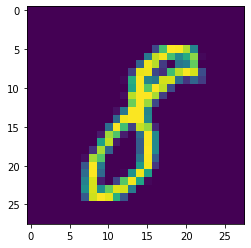

In [ ]:
plt.imshow(train_img[5000,:,:,0])

## Визуализируем исходные данные

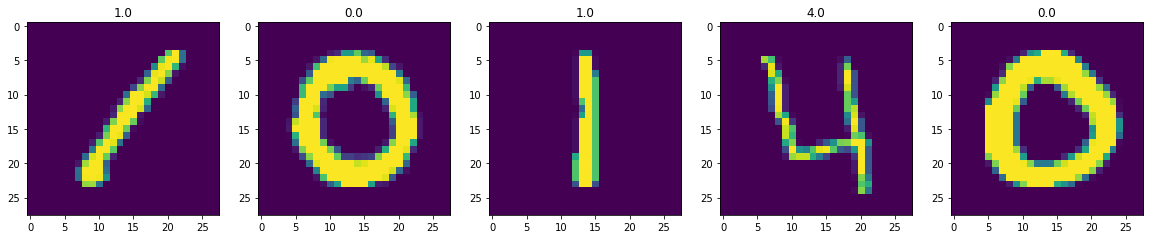

In [ ]:

fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5, :], 1):
    subplot = fig.add_subplot(1, 5, i)
    plt.imshow(img[:,:,0]);
    subplot.set_title('%s' % train_label[i - 1]);

## Разбиваем выборку на обучение и валидацию

In [ ]:
from sklearn.model_selection import train_test_split
y_train, y_val, x_train, x_val = train_test_split(
    train_label, train_img, test_size=0.2, random_state=42)

## Собираем сверточную сеть для обучения

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=16,
                           kernel_size=(3, 3),
                           padding='same',
                           activation='relu',
                           input_shape=x_train.shape[1:]),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
    
    tf.keras.layers.Conv2D(filters=32, 
                           kernel_size=(3, 3),
                           padding='same',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=None),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(128, activation=None),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 128)               2

## One-hot кодировка разметки

In [ ]:
y_train[:3]

array([6., 5., 3.])

In [ ]:
y_train_labels = tf.keras.utils.to_categorical(y_train)

In [ ]:
y_train_labels[:3]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_train_labels[2]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
print(y_train.shape)
print(y_train_labels.shape)

(33600,)
(33600, 10)


## Запускаем обучение

In [ ]:
model.fit(x_train, 
          y_train_labels,
          batch_size=32, 
          epochs=5,
          validation_split=0.2)

Epoch 1/5
840/840 [==============================] - 15s 7ms/step - loss: 1.6406 - accuracy: 0.5703 - val_loss: 0.4891 - val_accuracy: 0.8665
Epoch 2/5
840/840 [==============================] - 5s 6ms/step - loss: 0.6858 - accuracy: 0.7874 - val_loss: 0.2447 - val_accuracy: 0.9568
Epoch 3/5
840/840 [==============================] - 5s 6ms/step - loss: 0.5213 - accuracy: 0.8413 - val_loss: 0.2009 - val_accuracy: 0.9649
Epoch 4/5
840/840 [==============================] - 5s 6ms/step - loss: 0.3816 - accuracy: 0.8927 - val_loss: 0.1628 - val_accuracy: 0.9674
Epoch 5/5
831/840 [============================>.] - ETA: 0s - loss: 0.3144 - accuracy: 0.9122

## Предсказываем класс объекта

In [ ]:
y_pred = model.predict(x_val)
y_pred_labels = np.argmax(y_pred, axis=1)

## Оцениваем качество решение на валидационной выборке

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(y_val, y_pred_labels))

Accuracy: 0.978452380952381


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred_labels))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred_labels)

plt.figure(figsize=(10, 8))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

## Визуализируем предсказания для тестовой выборки

In [ ]:
y_pred_test = model.predict(test_img)
y_pred_test_labels = np.argmax(y_pred_test, axis=1)

In [ ]:
fig = plt.figure(figsize=(20, 10))
indices = np.random.choice(range(len(test_img)), 5)
img_prediction = zip(test_img[indices], y_pred_test_labels[indices])
for i, (img, pred) in enumerate(img_prediction, 1):
    subplot = fig.add_subplot(1, 5, i)
    plt.imshow(img[...,0], cmap='gray');
    subplot.set_title('%d' % pred);

## Готовим файл для отправки

In [ ]:
with open('submit.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(y_pred_test_labels, 1):
        dst.write('%s,%d\n' % (i, p))

In [ ]:
# Your submission scored 0.96814

In [ ]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [ ]:
!nvidia-smi

Mon Feb  7 17:24:18 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    75W / 149W |    540MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------